In [143]:
#libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [144]:
#get data from yahoo of any company
data_frame=web.DataReader('AMZN',data_source='yahoo',start='2010-01-01',end='2022-01-31')

In [145]:
#see the data
data_frame

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000
...,...,...,...,...,...,...
2022-01-25,2872.000000,2762.899902,2844.850098,2799.719971,4541200,2799.719971
2022-01-26,2903.699951,2746.370117,2895.000000,2777.449951,4780100,2777.449951
2022-01-27,2884.870117,2787.000000,2816.000000,2792.750000,3860100,2792.750000


In [146]:
#rows and columns
data_frame.shape

(3042, 6)

<AxesSubplot:xlabel='Date'>

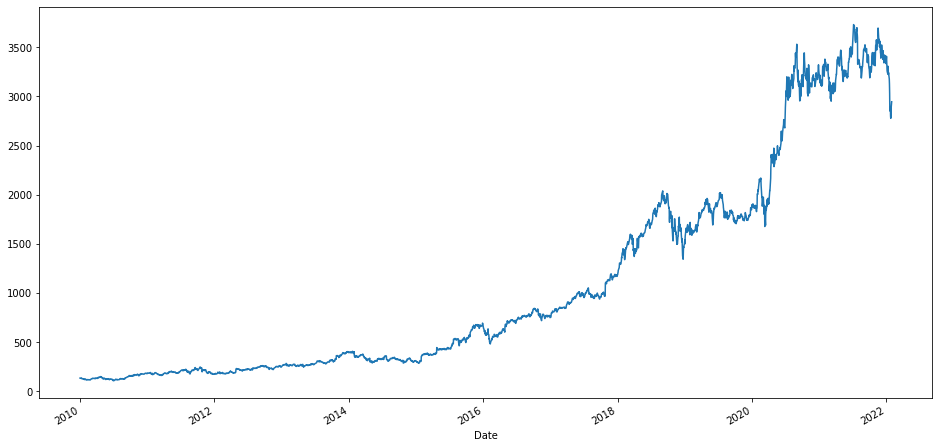

In [147]:
#see how the data looks like graphically
data_frame['Close'].plot(figsize=(16,8))

In [148]:
#get the close price of the stock data in a numpy array
data_close=data_frame.filter(['Close'])
data_close_set=data_close.values
#training set 80% of the data
training_data_len=math.ceil(len(data_close)*0.8)
training_data_len


2434

In [149]:
#scaling  the data
scale=MinMaxScaler(feature_range=(0,1))
scaled_data=scale.fit_transform(data_close)
scaled_data

array([[0.00715193],
       [0.00698079],
       [0.00719885],
       ...,
       [0.74090208],
       [0.76486423],
       [0.78322296]])

In [150]:
training_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(training_data)):
    x_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00715193, 0.00698079, 0.00719885, 0.00652534, 0.00590427,
       0.0068759 , 0.00598984, 0.00517279, 0.00565861, 0.00517279,
       0.00511483, 0.00524456, 0.00473943, 0.00497129, 0.0035387 ,
       0.00322955, 0.00300044, 0.00390306, 0.00480844, 0.0046373 ,
       0.00283206, 0.00262504, 0.00289555, 0.0020233 , 0.00242354,
       0.00226896, 0.0026002 , 0.00241526, 0.00316882, 0.00305013,
       0.00246218, 0.00212543, 0.002614  , 0.00245942, 0.00259468,
       0.00238213, 0.00306669, 0.00264712, 0.00270233, 0.00439715,
       0.00467042, 0.00476979, 0.00549851, 0.0056034 , 0.00593464,
       0.00557856, 0.00604505, 0.00689246, 0.00640665, 0.00621619,
       0.00639836, 0.00627415, 0.00666611, 0.00600088, 0.00603401,
       0.00570001, 0.00536325, 0.00720989, 0.00730098, 0.00731754])]
[0.007720548168261895]



In [151]:
#convert training datasets to numpy and reshaping the data
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2374, 60, 1)

In [152]:
#lstm model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [153]:
#running the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [154]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2374/2374 [==============================] - 34s 14ms/step - loss: 3.2018e-04


In [155]:
#creating test-data set
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=data_close_set[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [156]:
#make data into numpy
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [157]:
#Get the predicted price of the stock
predictions=model.predict(x_test)
predictions=scale.inverse_transform(predictions)

In [158]:
#get root mean squared error
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse


206.58723012536825

In [159]:
#plot data
train=data_close[:training_data_len]
valid=data_close[training_data_len:]
valid['Predictions']=predictions


C:\Users\risha\AppData\Local\Temp\ipykernel_12088\1090442803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


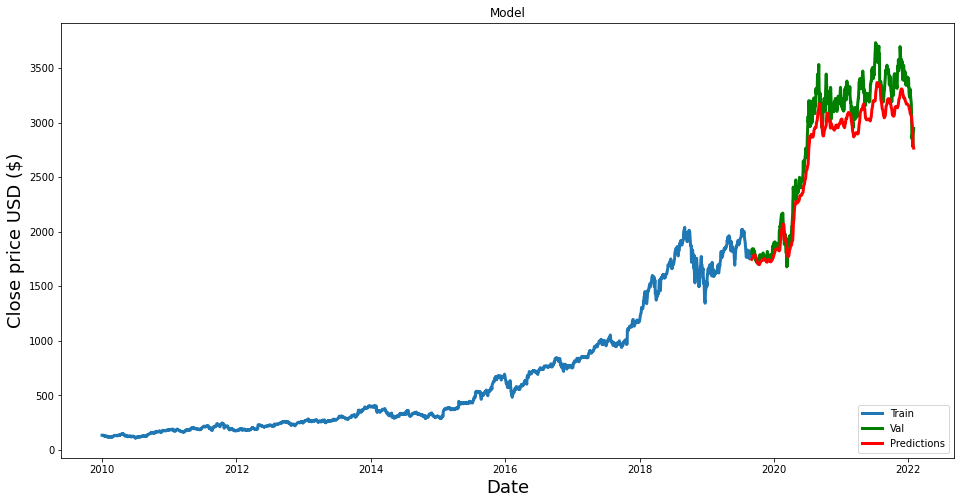

In [160]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'],linewidth=3)
plt.plot(valid['Close'],color='Green',linewidth=3,label='Closed Prices')
plt.plot(valid['Predictions'],color='red',linewidth=3,label='Predictions')
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [161]:
valid

,Close,Predictions
Date,,
2019-09-04,1800.619995,1745.894409
2019-09-05,1840.719971,1747.803101
2019-09-06,1833.510010,1753.933350
2019-09-09,1831.349976,1761.038940
2019-09-10,1820.550049,1767.782959
...,...,...
2022-01-25,2799.719971,2924.510986
2022-01-26,2777.449951,2877.378418
2022-01-27,2792.750000,2831.153564


In [162]:
#Analysis on last 60 days to predict the price of the stock
stock_data = web.DataReader('AMZN', data_source='yahoo', start='2021-01-01', end='2022-01-31')
stock_data_close = stock_data.filter(['Close'])
stock_data_close_set = stock_data_close[-60:].values
days_scaled = scale.transform(stock_data_close_set)
X_test_sample = []
X_test_sample.append(days_scaled)
X_test_sample = np.array(X_test_sample)
X_test_sample= np.reshape(X_test_sample, (X_test_sample.shape[0], X_test_sample.shape[1], 1))
predicted_price = model.predict(X_test_sample)
predicted_price = scale.inverse_transform(predicted_price)
print(predicted_price)


D:\VS CODE\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[[2755.1687]]


In [163]:
stock_data_actual = web.DataReader('AMZN', data_source='yahoo', start='2022-01-31', end='2022-01-31')
print(stock_data_actual['Close'])



Date
2022-01-31    2945.75
Name: Close, dtype: float64


In [164]:
#accuracy
print("Accuracy of the model is:")
error_percent=abs((predicted_price[0][0]-stock_data_actual['Close'][0])/stock_data_actual['Close'][0])*100
print(100-error_percent)


Accuracy of the model is:
93.53029622920734
